In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns  
import matplotlib.pyplot as plt
from scipy.stats import norm
# might be needed depending on your version of Jupyter
%matplotlib inline
from pandas_datareader import data as wb
from scipy.stats import norm

/Users/tamerhousseinhag/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
df = pd.read_csv('../Production/Pandey_Ch07_Production_Engineering_Code/data/Well_Monthly_ProdN2.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79392 entries, 0 to 79391
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UWI         79392 non-null  object
 1   START_DATE  79392 non-null  object
 2   OIL         79392 non-null  int64 
 3   GAS         79392 non-null  int64 
 4   WATER       79392 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 3.0+ MB


In [5]:
df.isnull().sum()

UWI           0
START_DATE    0
OIL           0
GAS           0
WATER         0
dtype: int64

In [6]:
df.head()

,UWI,START_DATE,OIL,GAS,WATER
0,BR819,1965-05-01,1785,0,0
1,AB257,1973-11-01,26550,22470,0
2,TR758,1973-11-01,122600,112100,0
3,ON369,1973-11-01,65134,36450,0
4,DS652,1973-11-01,61277,60180,0


In [7]:
df

,UWI,START_DATE,OIL,GAS,WATER
0,BR819,1965-05-01,1785,0,0
1,AB257,1973-11-01,26550,22470,0
2,TR758,1973-11-01,122600,112100,0
3,ON369,1973-11-01,65134,36450,0
4,DS652,1973-11-01,61277,60180,0
...,...,...,...,...,...
79387,RK103,2018-06-01,39467,44068,0
79388,TR855,2018-06-01,38581,44513,31049
79389,BR477,2018-06-01,5740,4052,434
79390,RK301,2018-06-01,0,0,0


In [8]:
df.corr()['OIL'].sort_values()

WATER   -0.077144
GAS      0.959902
OIL      1.000000
Name: OIL, dtype: float64

In [9]:
df.corr()['GAS'].sort_values()

WATER   -0.049226
OIL      0.959902
GAS      1.000000
Name: GAS, dtype: float64

In [10]:
df.corr()['WATER'].sort_values()

OIL     -0.077144
GAS     -0.049226
WATER    1.000000
Name: WATER, dtype: float64

In [11]:
df.corr()

,OIL,GAS,WATER
OIL,1.000000,0.959902,-0.077144
GAS,0.959902,1.000000,-0.049226
WATER,-0.077144,-0.049226,1.000000


In [12]:
from datetime import datetime
import statsmodels.api as sm

In [13]:
df.set_index('START_DATE',inplace=True)

In [14]:
df

,UWI,OIL,GAS,WATER
START_DATE,,,,
1965-05-01,BR819,1785,0,0
1973-11-01,AB257,26550,22470,0
1973-11-01,TR758,122600,112100,0
1973-11-01,ON369,65134,36450,0
1973-11-01,DS652,61277,60180,0
...,...,...,...,...
2018-06-01,RK103,39467,44068,0
2018-06-01,TR855,38581,44513,31049
2018-06-01,BR477,5740,4052,434


In [15]:
df = df.drop('WATER',axis=1)

In [16]:
df = df.drop('UWI',axis=1)

In [17]:
df = df.drop('GAS',axis=1)

In [18]:
df

,OIL
START_DATE,
1965-05-01,1785
1973-11-01,26550
1973-11-01,122600
1973-11-01,65134
1973-11-01,61277
...,...
2018-06-01,39467
2018-06-01,38581
2018-06-01,5740


In [19]:
from scipy import stats
import statsmodels.api as sm

In [20]:
df=df.replace(0, np.nan)

In [21]:
df=df.replace(0, np.nan).dropna(subset=["OIL"], how="all")

In [22]:
df

,OIL
START_DATE,
1965-05-01,1785.0
1973-11-01,26550.0
1973-11-01,122600.0
1973-11-01,65134.0
1973-11-01,61277.0
...,...
2018-06-01,41652.0
2018-06-01,47494.0
2018-06-01,39467.0


In [23]:
log_returns=np.log(1+df.pct_change())
log_returns

,OIL
START_DATE,
1965-05-01,NaN
1973-11-01,2.699611
1973-11-01,1.529897
1973-11-01,-0.632480
1973-11-01,-0.061042
...,...
2018-06-01,0.111107
2018-06-01,0.131254
2018-06-01,-0.185139


In [24]:
#log_returns=log_returns.replace([np.inf, -np.inf], np.nan)

In [25]:
#df=df.dropna(subset=["OIL"], how="all")

In [26]:
log_returns

,OIL
START_DATE,
1965-05-01,NaN
1973-11-01,2.699611
1973-11-01,1.529897
1973-11-01,-0.632480
1973-11-01,-0.061042
...,...
2018-06-01,0.111107
2018-06-01,0.131254
2018-06-01,-0.185139


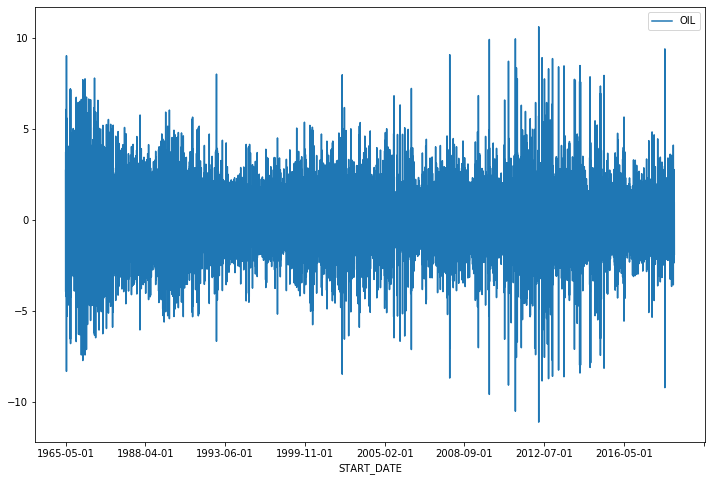

In [27]:
log_returns.plot(figsize=(12,8));

In [28]:
u=log_returns.mean()
u

OIL    0.000015
dtype: float64

In [29]:
drift=u-(0.5*u)
drift

OIL    0.000008
dtype: float64

In [30]:
stdev=log_returns.std()
stdev

OIL    1.060771
dtype: float64

In [31]:
drift.values

array([7.65326166e-06])

In [32]:
stdev.values

array([1.06077147])

In [33]:
norm.ppf(0.95)

1.6448536269514722

In [34]:
x=np.random.rand(10,2)
x

array([[0.41011355, 0.61278341],
       [0.48577072, 0.31594563],
       [0.07112736, 0.86618572],
       [0.17399087, 0.54879848],
       [0.12007864, 0.98290153],
       [0.34668152, 0.63177465],
       [0.3554959 , 0.03455633],
       [0.28769933, 0.71246358],
       [0.32476986, 0.72451465],
       [0.73998045, 0.65795509]])

In [35]:
norm.ppf(x)

array([[-0.22725291,  0.28658098],
       [-0.03567509, -0.4790666 ],
       [-1.46744616,  1.10854026],
       [-0.93851124,  0.12262628],
       [-1.17459379,  2.11774175],
       [-0.39429529,  0.33655722],
       [-0.37052441, -1.8176826 ],
       [-0.56011844,  0.56059621],
       [-0.45440172,  0.59630618],
       [ 0.64328514,  0.4068886 ]])

In [36]:
z=norm.ppf(np.random.rand(10,2))
z

array([[-1.51801858,  0.36825086],
       [ 0.38547545, -0.17625605],
       [-1.43138653, -0.16198316],
       [ 0.67750954,  0.29717973],
       [-0.81787952,  0.44553574],
       [ 0.5268898 , -0.74676833],
       [ 0.67423042, -0.51660315],
       [ 0.79754314, -0.56588614],
       [-0.29300701, -1.01996392],
       [ 1.14265964, -1.00212672]])

In [37]:
t_intervals=1000
iterations=50

In [38]:
Z=norm.ppf(np.random.rand(t_intervals,iterations))
Z

array([[ 0.18377063, -0.22670628, -0.97649396, ..., -0.48595056,
         1.15667644, -1.45046735],
       [-1.03646521, -1.14854498,  0.43438325, ...,  1.1729923 ,
        -0.1762676 , -1.4955721 ],
       [-0.44623466, -0.96906111,  0.11127313, ...,  0.6050042 ,
        -0.36010254,  0.68064315],
       ...,
       [ 0.20405624,  0.97652772, -0.47666771, ..., -0.79344767,
         0.61385383, -0.44356929],
       [ 0.60207081,  0.11601819, -0.2838011 , ..., -0.33338763,
        -0.25041528, -0.60102228],
       [ 1.94564343,  1.27982915, -0.76572058, ...,  2.11984176,
         0.11270308, -0.06984312]])

In [39]:
r=(drift.values+(stdev.values*Z))
r

array([[ 0.1949463 , -0.2404759 , -1.03582928, ..., -0.51547484,
         1.22697702, -1.53860673],
       [-1.09944507, -1.21833609,  0.46078901, ...,  1.24428442,
        -0.18697198, -1.58645256],
       [-0.47334534, -1.02794472,  0.11804301, ...,  0.64177885,
        -0.38197884,  0.72201449],
       ...,
       [ 0.21646469,  1.03588039, -0.50562785, ..., -0.841659  ,
         0.65116629, -0.47051799],
       [ 0.63866719,  0.12307644, -0.30104045, ..., -0.35364044,
        -0.26562573, -0.63753963],
       [ 2.0638907 ,  1.3576139 , -0.8122469 , ...,  2.24867531,
         0.11955987, -0.07407994]])

In [40]:
monthly_prod=np.exp(r)
monthly_prod

array([[1.21524572, 0.7862536 , 0.35493192, ..., 0.59721694, 3.41090283,
        0.21468   ],
       [0.33305586, 0.29572181, 1.58532432, ..., 3.47045051, 0.82946697,
        0.20465031],
       [0.62291491, 0.35774146, 1.12529251, ..., 1.89985743, 0.68250949,
        2.05857602],
       ...,
       [1.24167924, 2.81758572, 0.60312678, ..., 0.43099491, 1.9177762 ,
        0.62467861],
       [1.89395492, 1.13097086, 0.74004784, ..., 0.70212738, 0.76672604,
        0.52859136],
       [7.87655556, 3.88690766, 0.44385964, ..., 9.47517586, 1.12700072,
        0.92859746]])

In [41]:
S0=df.iloc[-1]
S0

OIL    5740.0
Name: 2018-06-01, dtype: float64

In [42]:
Oil_Rate=np.zeros_like(monthly_prod)
Oil_Rate

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [43]:
Oil_Rate[0]=S0
Oil_Rate

array([[5740., 5740., 5740., ..., 5740., 5740., 5740.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       ...,
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.]])

In [44]:
for t in range(1,t_intervals):
    Oil_Rate[t]=Oil_Rate[t-1]*monthly_prod[t]
    
Oil_Rate

array([[5.74000000e+03, 5.74000000e+03, 5.74000000e+03, ...,
        5.74000000e+03, 5.74000000e+03, 5.74000000e+03],
       [1.91174062e+03, 1.69744320e+03, 9.09976162e+03, ...,
        1.99203860e+04, 4.76114043e+03, 1.17469278e+03],
       [1.19085174e+03, 6.07245814e+02, 1.02398936e+04, ...,
        3.78458933e+04, 3.24952354e+03, 2.41819437e+03],
       ...,
       [5.03047535e+00, 3.20610197e+00, 1.49200973e+01, ...,
        1.19885543e-01, 3.05157366e+28, 3.47796710e+06],
       [9.52749352e+00, 3.62600791e+00, 1.10415857e+01, ...,
        8.41749223e-02, 2.33972098e+28, 1.83842334e+06],
       [7.50438321e+01, 1.40939580e+01, 4.90091425e+00, ...,
        7.97572192e-01, 2.63686722e+28, 1.70715524e+06]])

(835, 875)

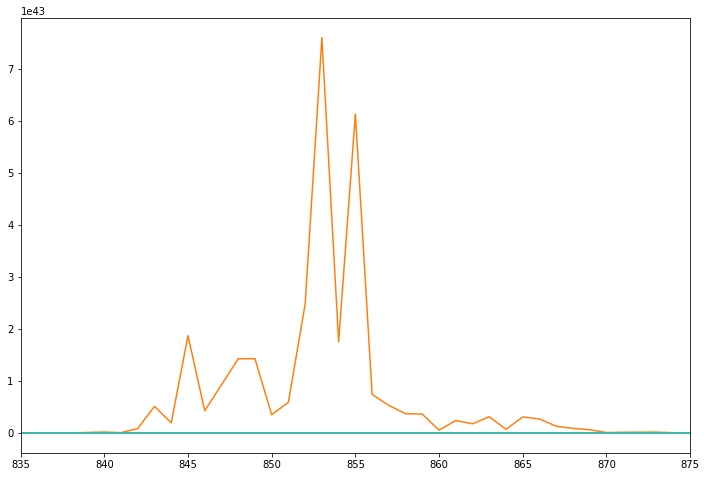

In [49]:
plt.figure(figsize=(12,8));
plt.plot(Oil_Rate);#[:251,:1000]);
plt.xlim([835,875])
#plt.ylim([0,1400])

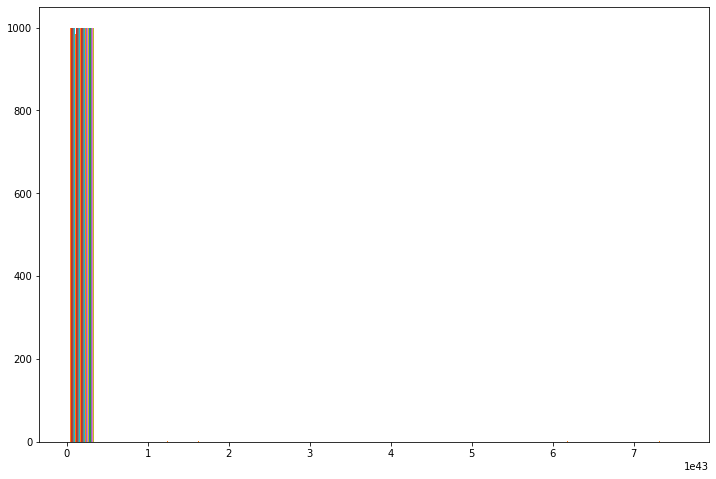

In [54]:
plt.figure(figsize=(12,8));
plt.hist(Oil_Rate,bins=20);
#plt.xlim(left=0,right=0.1)
#plt.xlim([0,0.1])
#plt.ylim([0,400])